In [126]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram


In [127]:
# As allowed to use scipy, (Moodle Post 25 Sept, 2023 , 11:53 p.m.)

linkage_types = ['single', 'complete', 'average']
distance_types = ['euclidean', 'cosine']

class Hierarchial_Clustering():

    def __init__(self, dataset, linkage_type, data_type):
        self.dataset = dataset
        self.linkage_type = linkage_type
        self.data_type = data_type
    
    def change_params(self, linkage_type, data_type):
        self.linkage_type = linkage_type
        self.data_type = data_type

    def linkage_matrix(self):
        return sch.linkage(self.dataset, method=self.linkage_type, metric=self.data_type, optimal_ordering=True)

    def plot_dendogram(self, Z):
        # Z is the linkage matrix
        fig = plt.figure(figsize=(25, 10))
        dn = dendrogram(Z)
        plt.title('Dendogram for Hierarchial Clustering using ' + self.linkage_type + ' Linkage and ' + self.data_type + ' Distance')
        plt.xlabel('Data Point Indexes')
        plt.ylabel('Distance')
        plt.show()


In [128]:
# Getting the dataset

# part 1
dataset_new_customers = pd.read_csv("./SMAI-Dataset-hc-dataset/new_customers.csv")

# part 2
dataset_genes = pd.read_csv("./SMAI-Dataset-gene-expression/gene.csv")


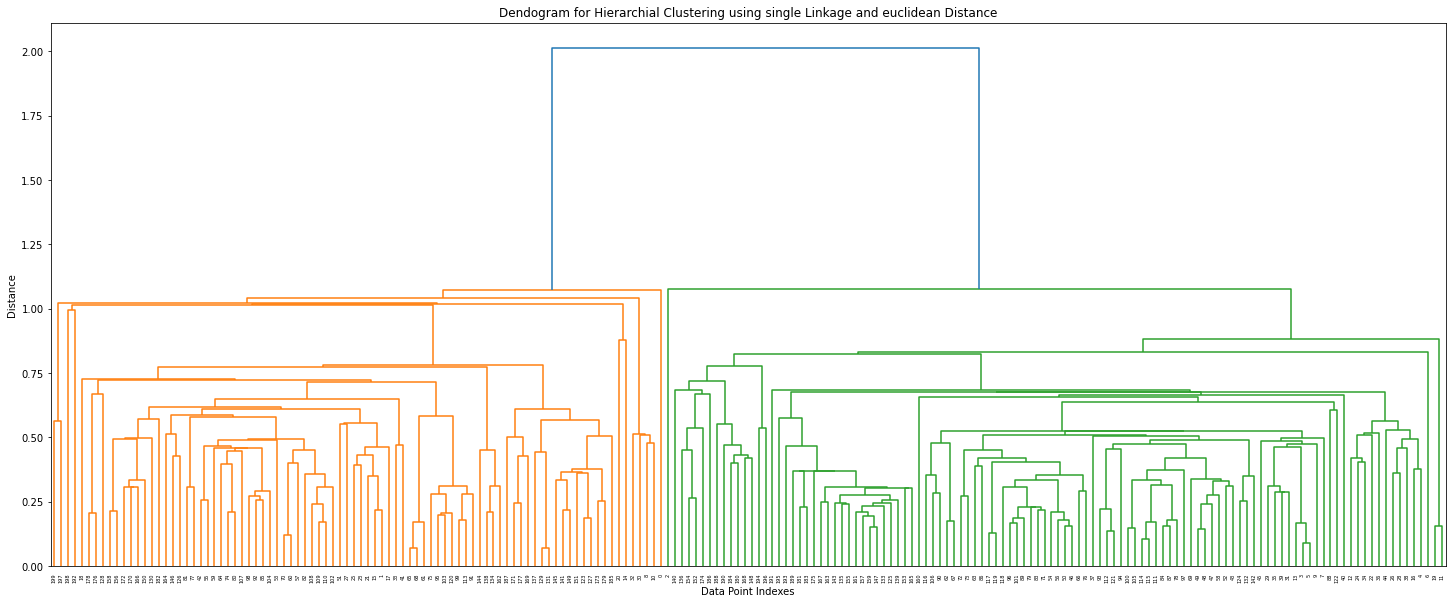

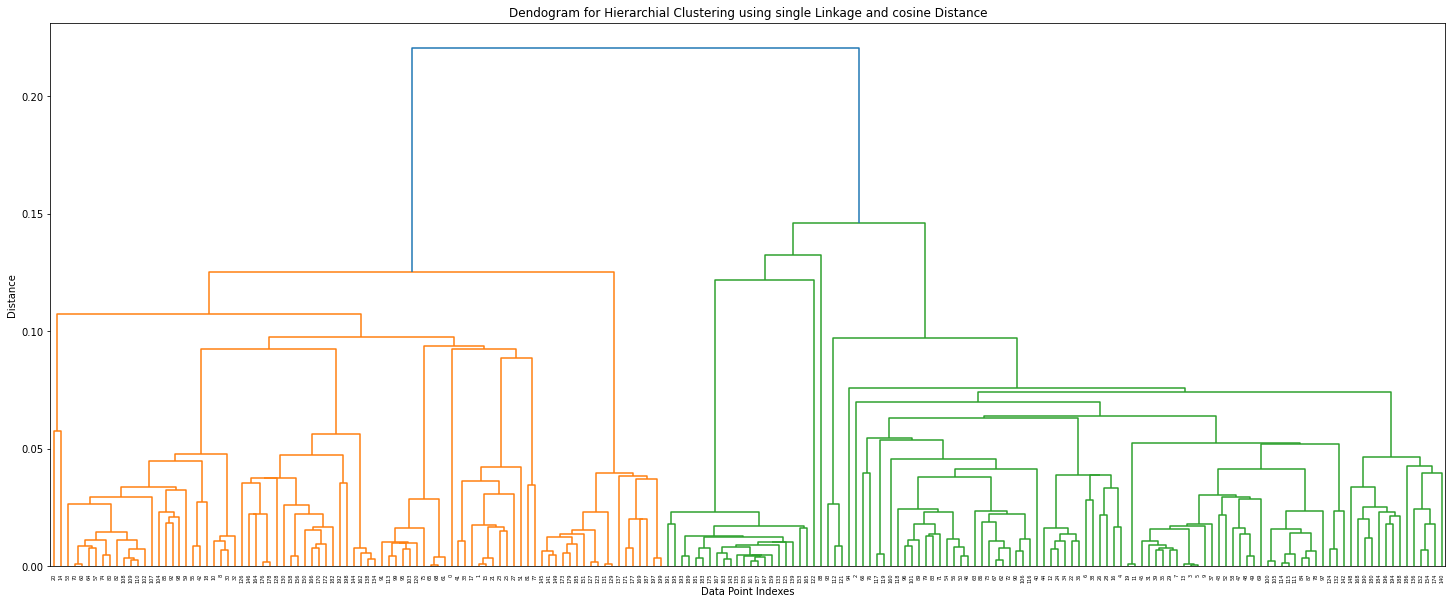

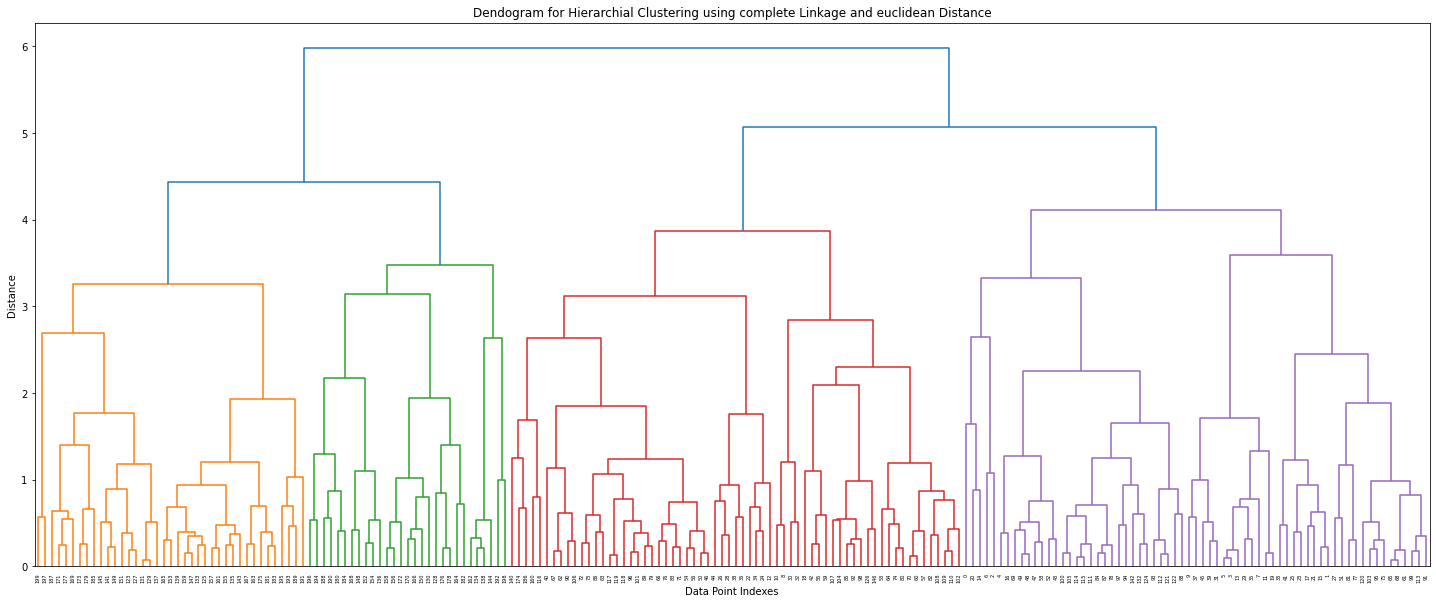

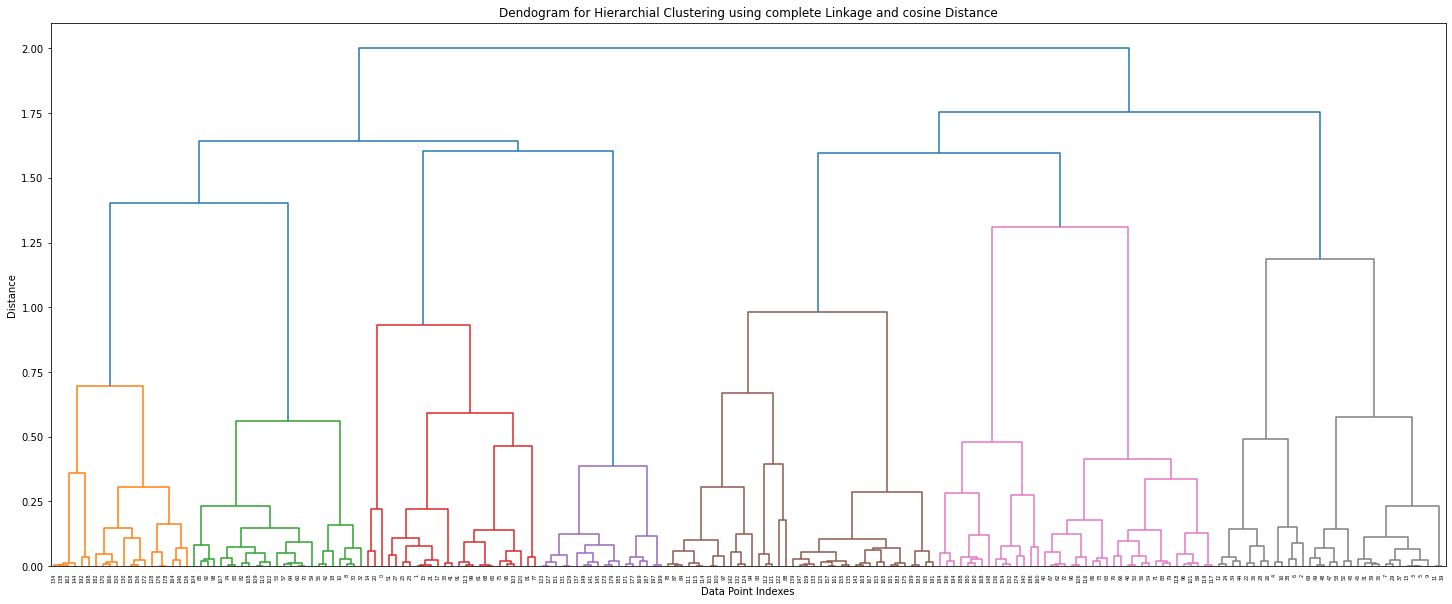

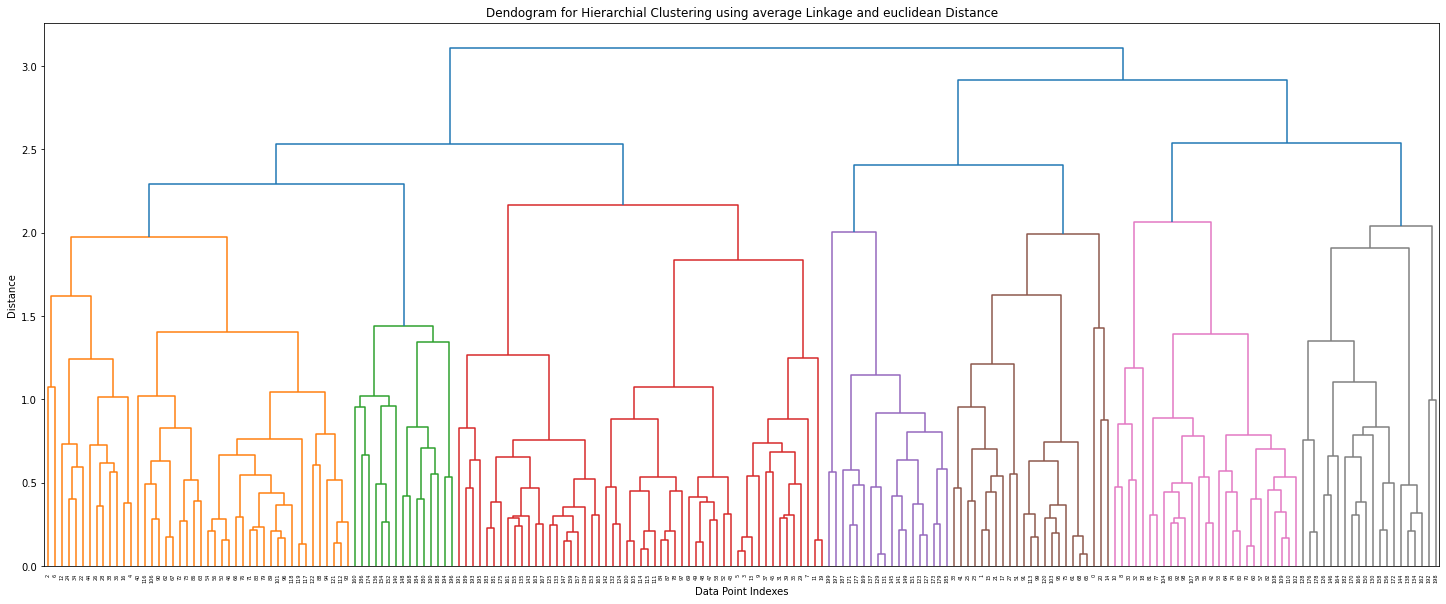

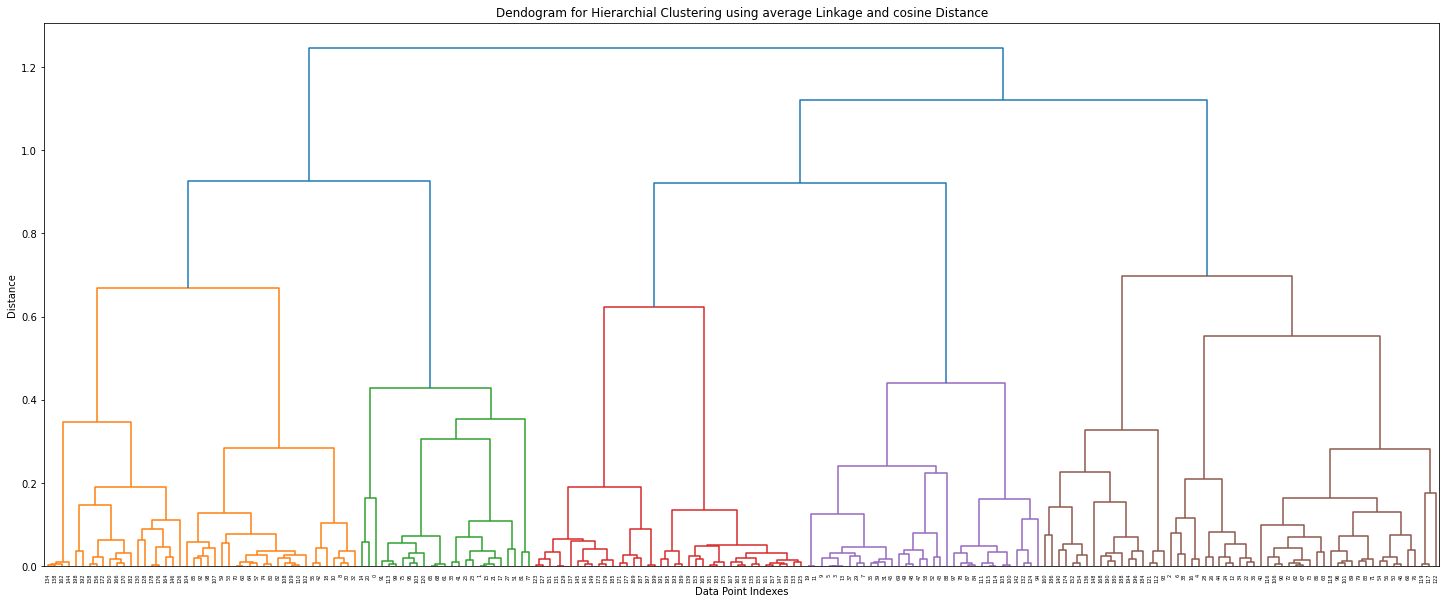

Randomly choosing the linkage type and distance type and dropping features
Linkage Type:  average
Distance Type:  euclidean

Dropping feature:  Genre


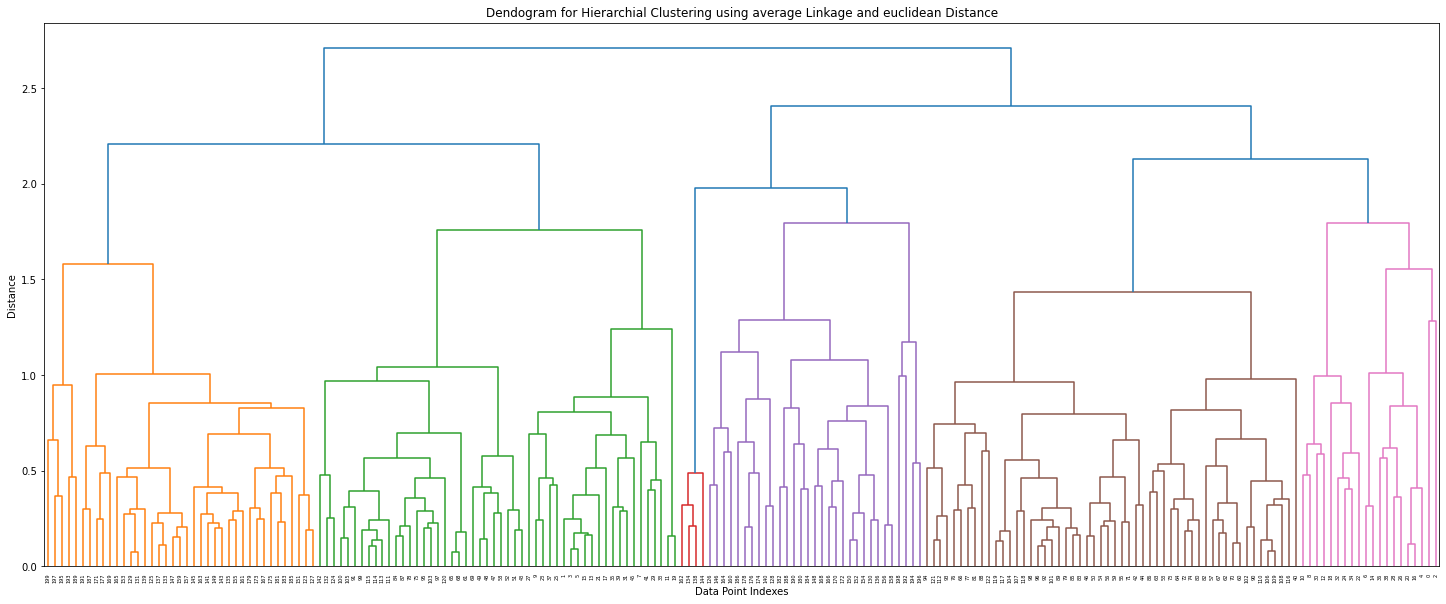


Dropping feature:  Age


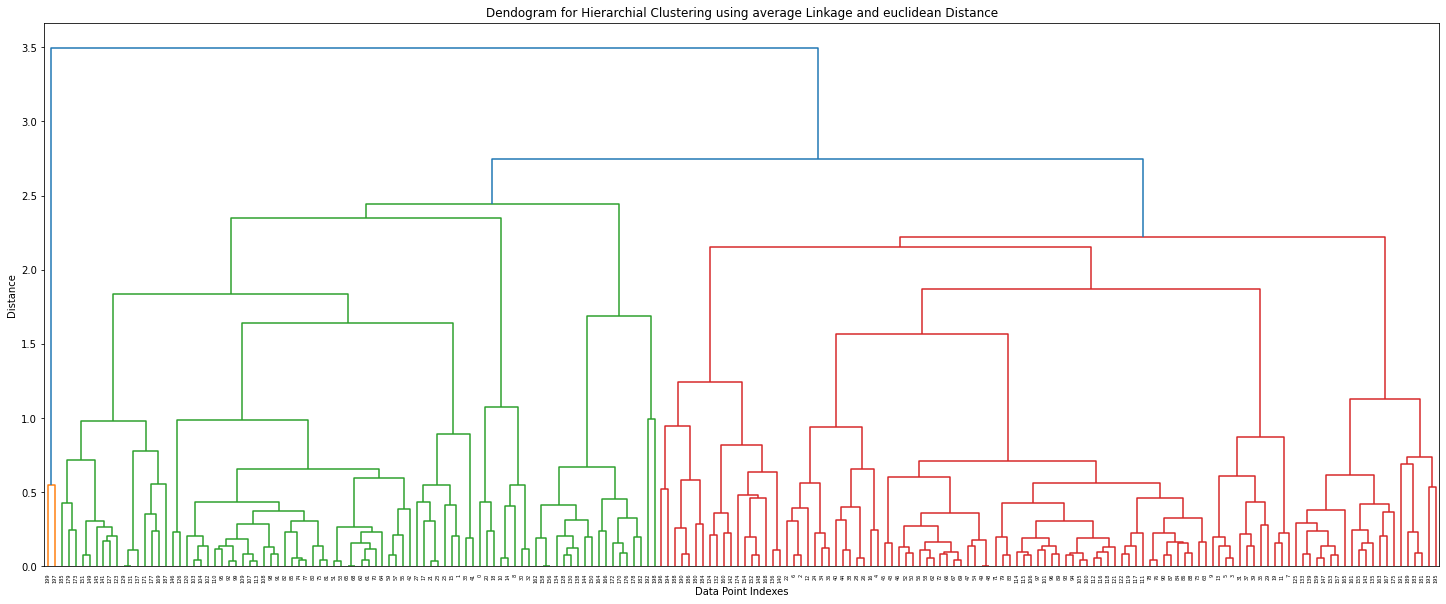


Dropping feature:  Annual Income (k$)


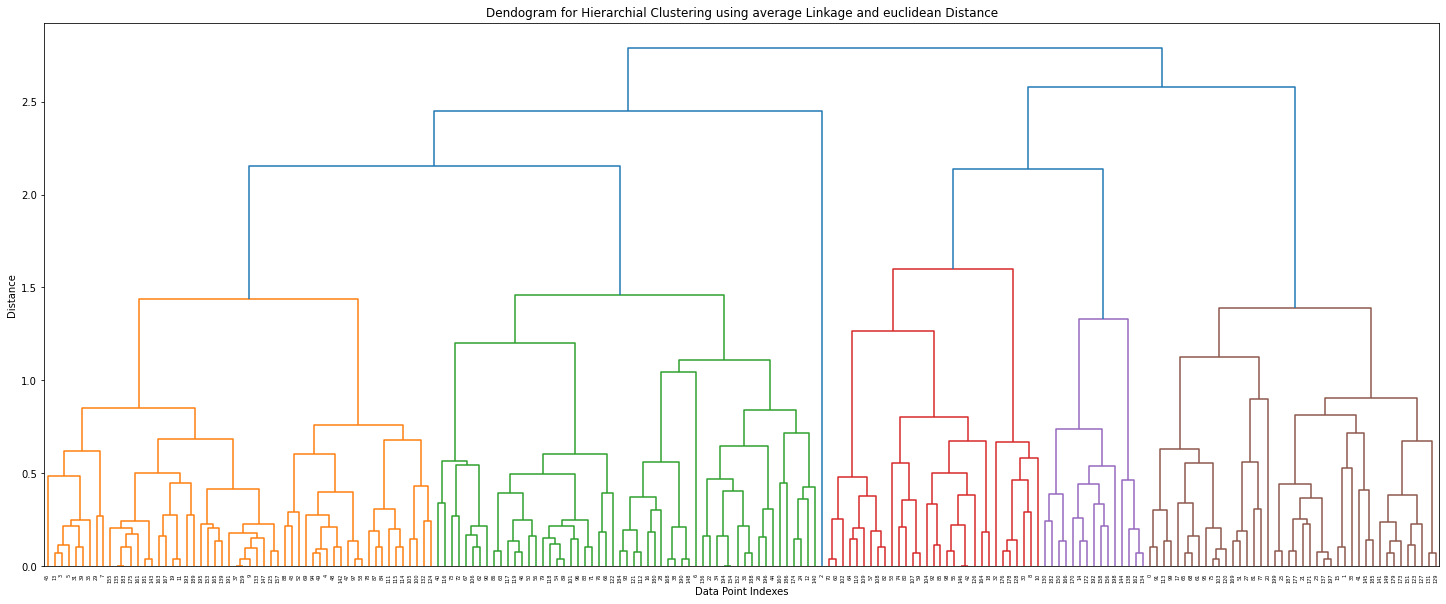


Dropping feature:  Spending Score (1-100)


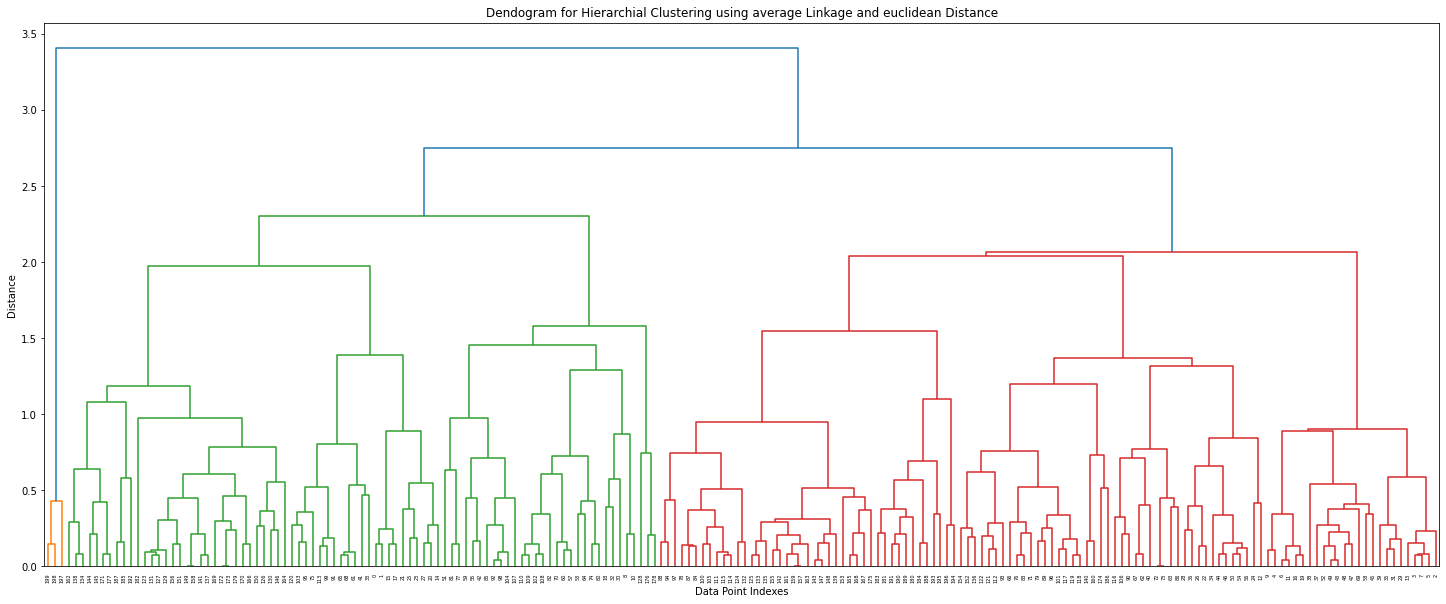

In [129]:
# Part 1
# dropping the customer id column
dataset_new_customers = dataset_new_customers.drop(['CustomerID'], axis=1)

# changing the categorical data to numerical data i.e. change male female to 0 and 1
dataset_new_customers['Genre'] = dataset_new_customers['Genre'].replace(
    {'Male': 1, 'Female': 0})

# standardizing the data 
dataset_new_customers = (dataset_new_customers - dataset_new_customers.mean())/dataset_new_customers.std()

# running the model
hc = Hierarchial_Clustering(dataset_new_customers, linkage_types[0], distance_types[0])
for linkage_type in linkage_types:
    for distance_type in distance_types:
        hc.change_params(linkage_type, distance_type)
        Z = hc.linkage_matrix()
        hc.plot_dendogram(Z)

# Randomly choosing the linkage type and distance type and dropping features
print("Randomly choosing the linkage type and distance type and dropping features")
rand_linkage_type = np.random.choice(linkage_types)
rand_distance_type = np.random.choice(distance_types)
print("Linkage Type: ", rand_linkage_type)
print("Distance Type: ", rand_distance_type)

for cols in dataset_new_customers.columns:
    hc.change_params(rand_linkage_type, rand_distance_type)
    hc.dataset = dataset_new_customers.drop([cols], axis=1)
    Z = hc.linkage_matrix()
    print("\nDropping feature: ", cols)
    hc.plot_dendogram(Z)


### Observations on varying linkages and features

#### Linkages:
##### We observe that `single` linkage gives long and unbalanced clusters.
##### `complete` linkage gives balanced clusters.
##### `average` linkage gives clusters with medium length and balanced.


#### Features:
##### We observe that distance between clusters becomes large on dropping 'Income' and 'Annual Spending'.

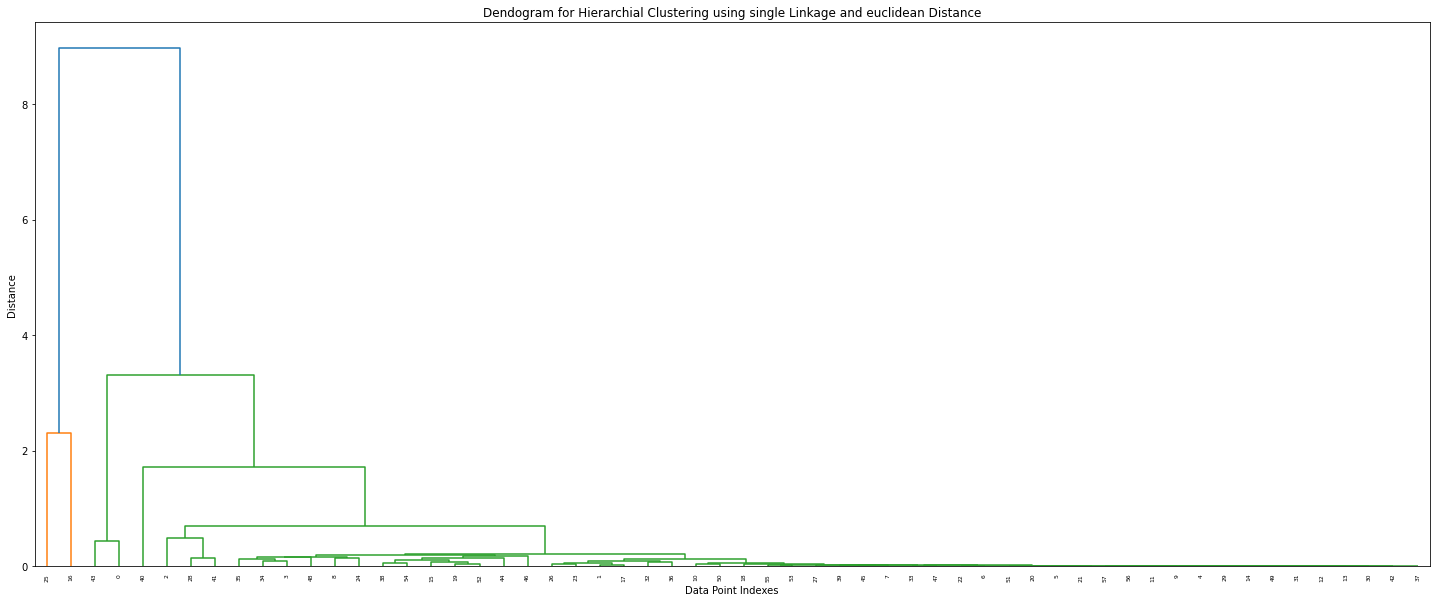

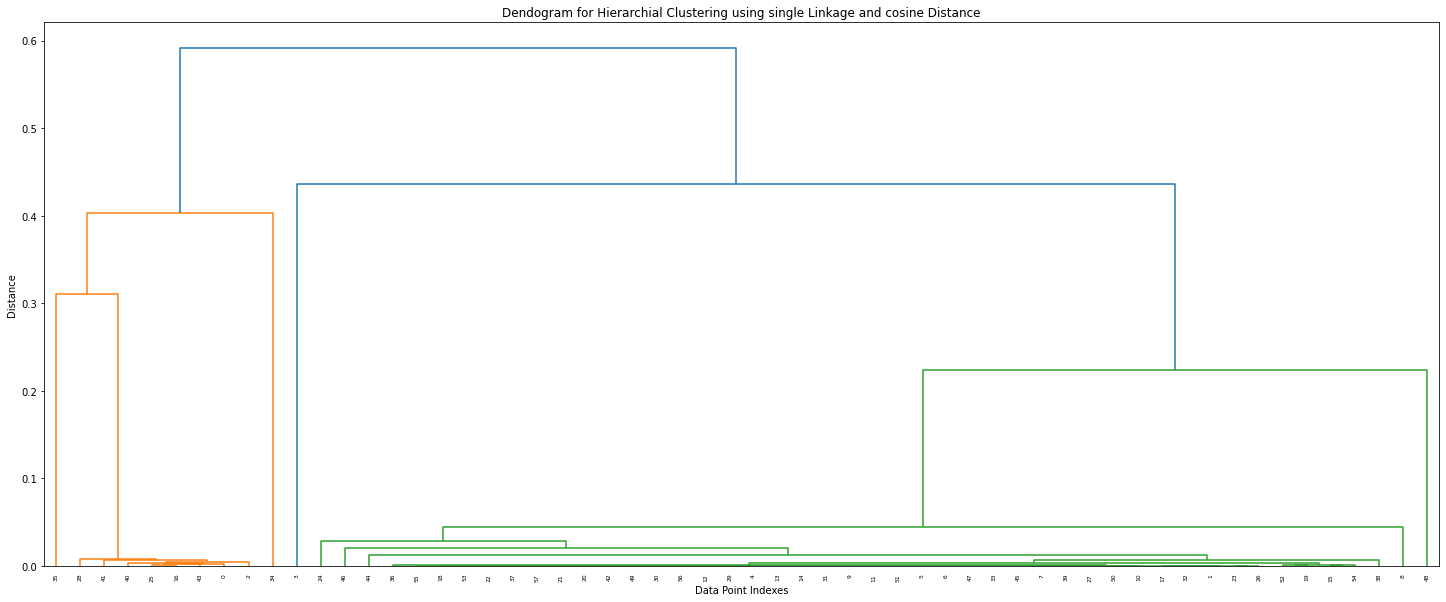

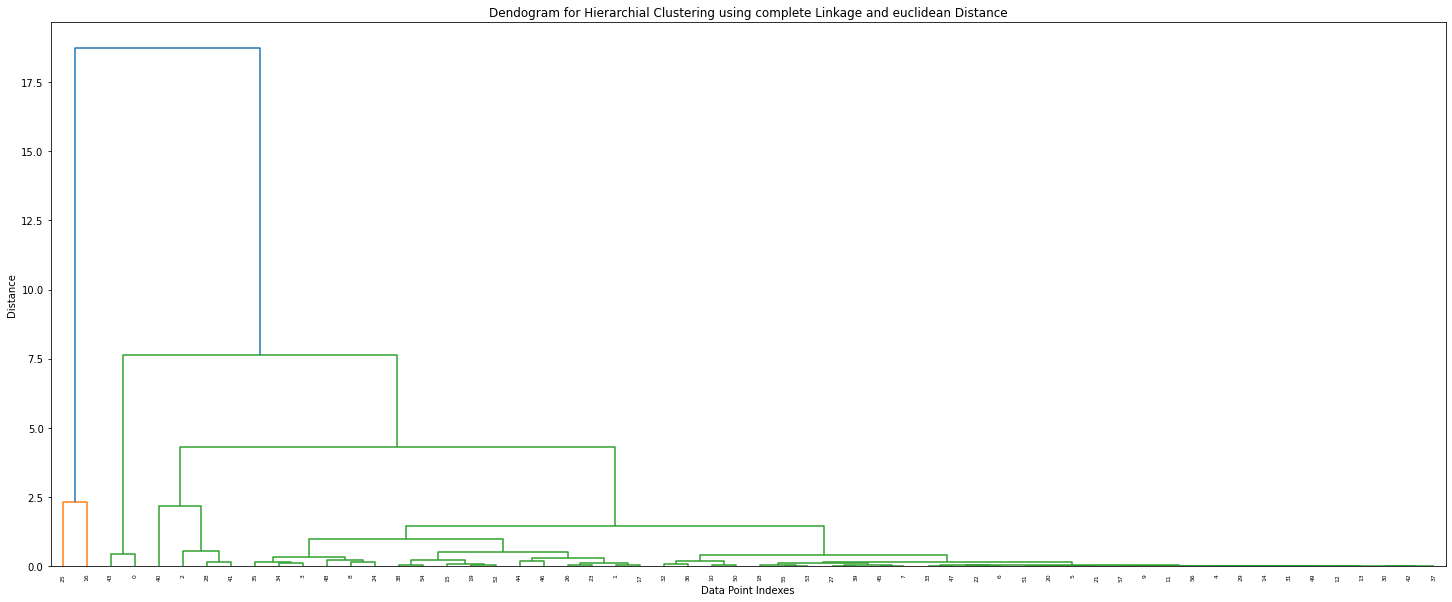

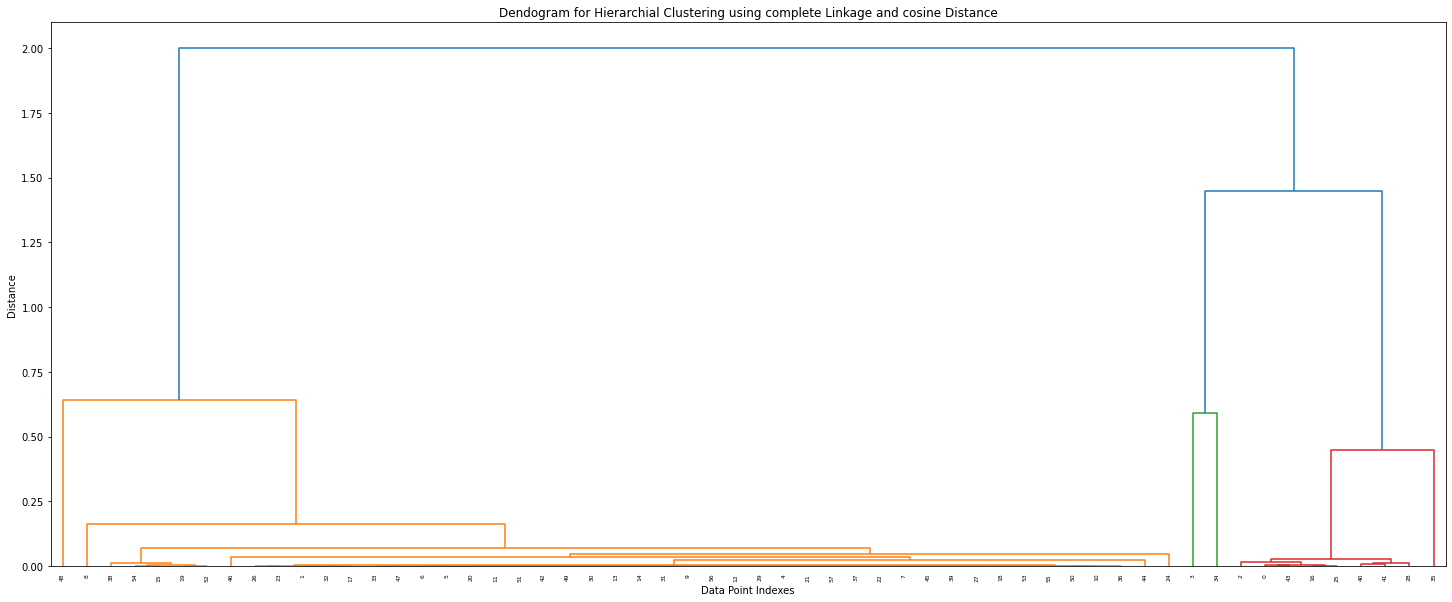

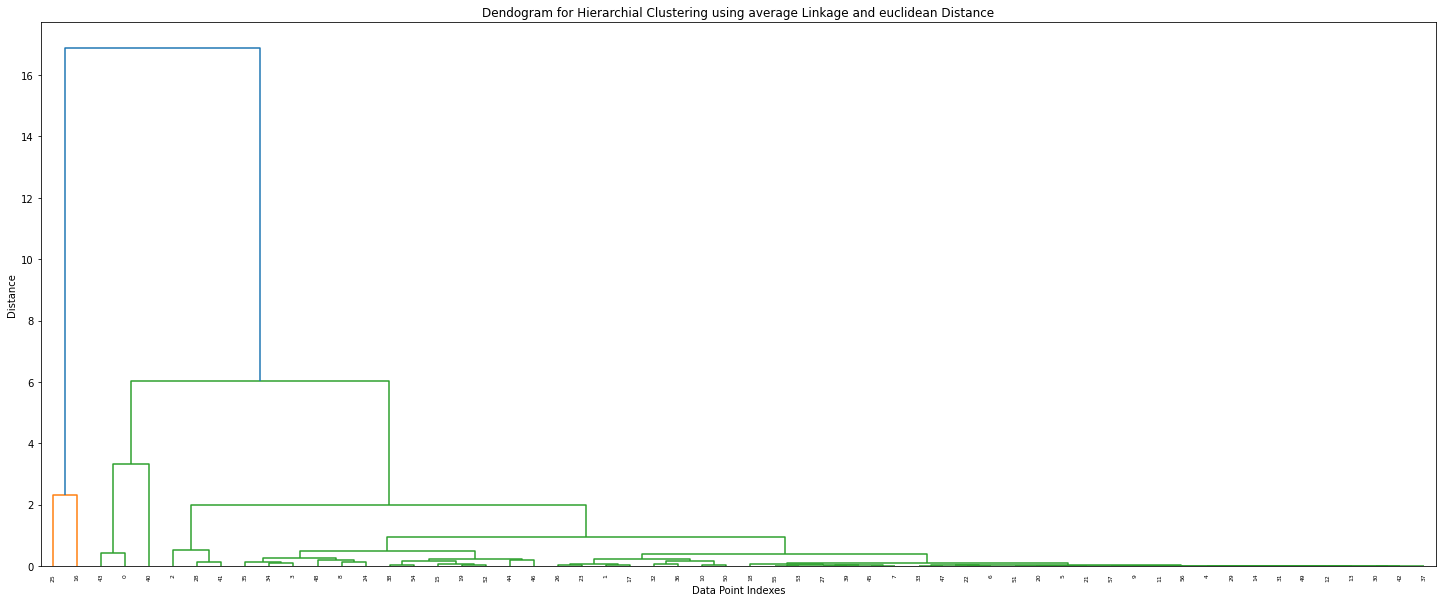

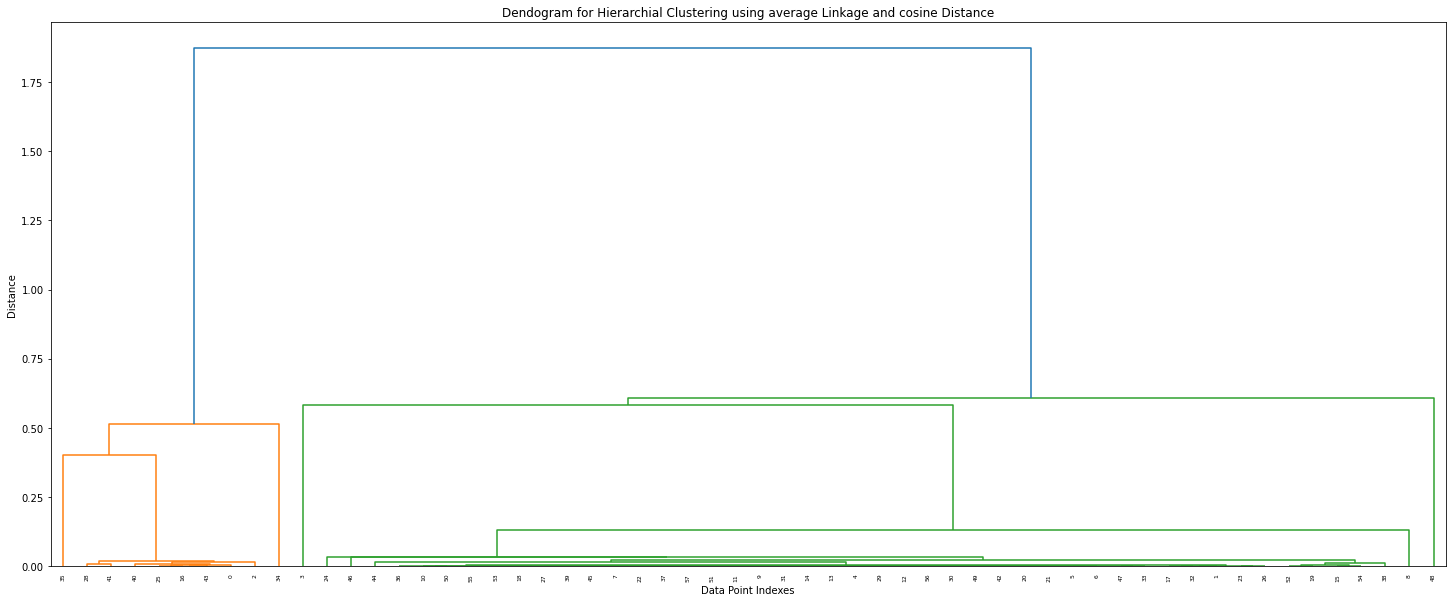

Randomly choosing the linkage type and distance type and dropping features
Linkage Type:  complete
Distance Type:  cosine

Dropping feature:  GSM613412


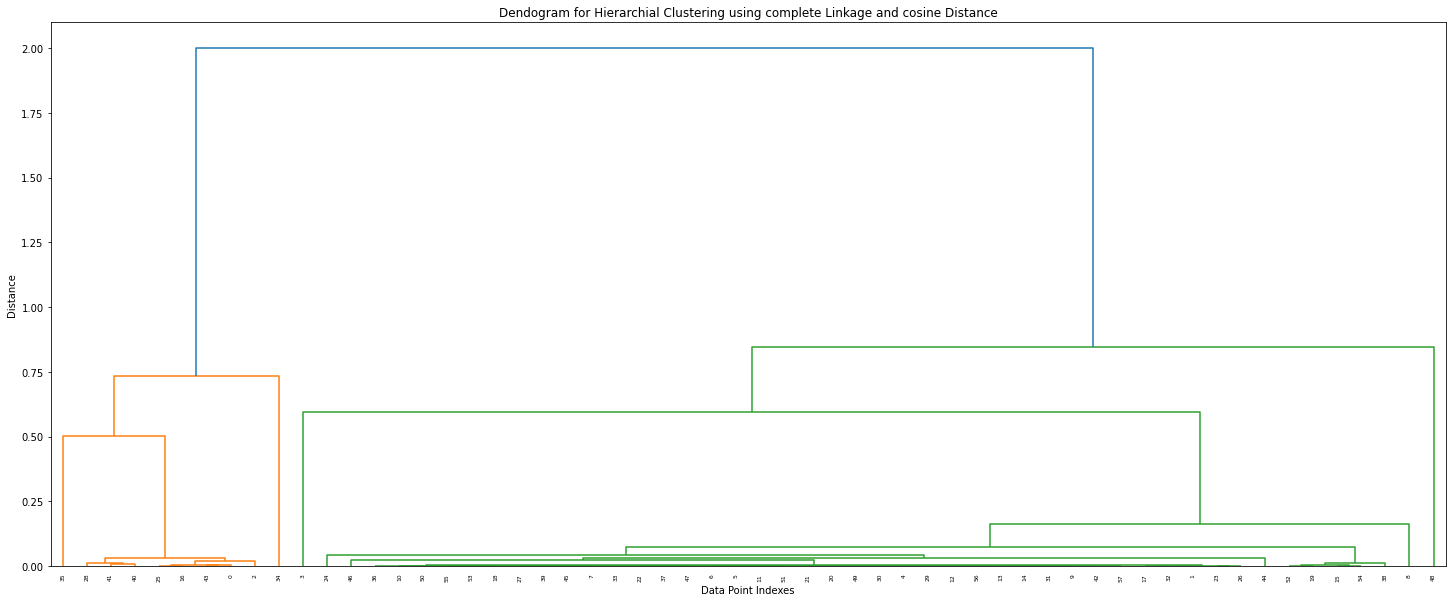


Dropping feature:  GSM613413


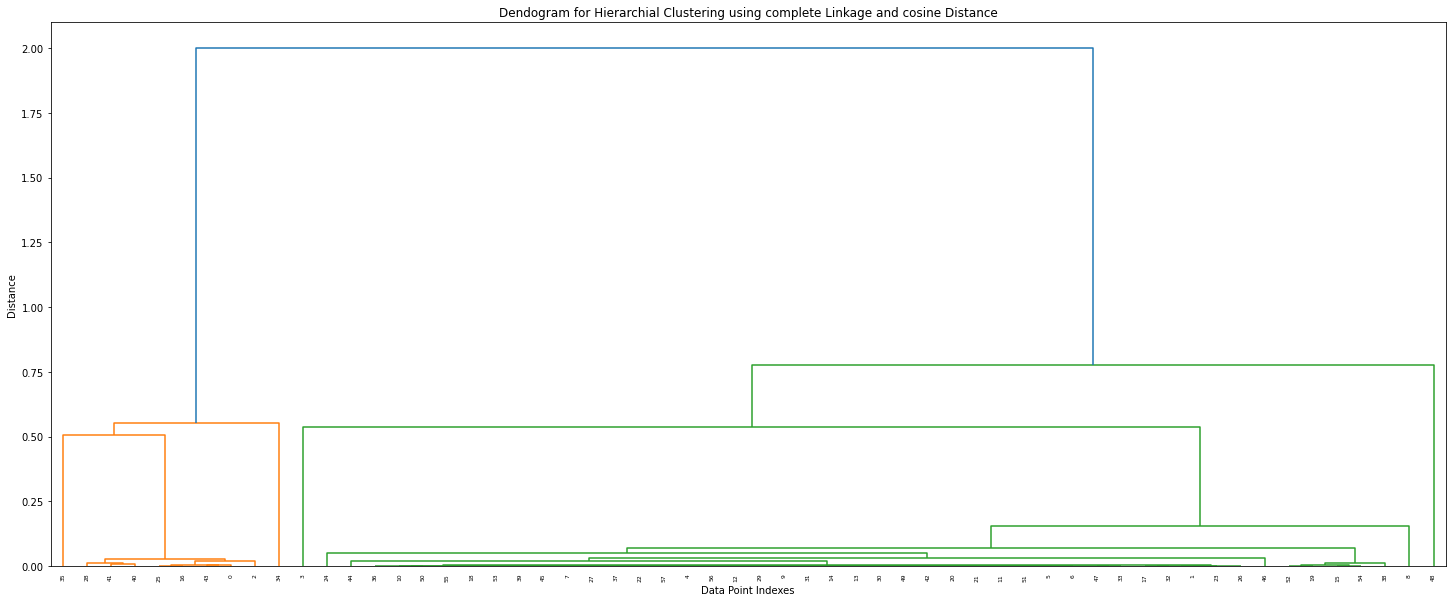


Dropping feature:  GSM613414


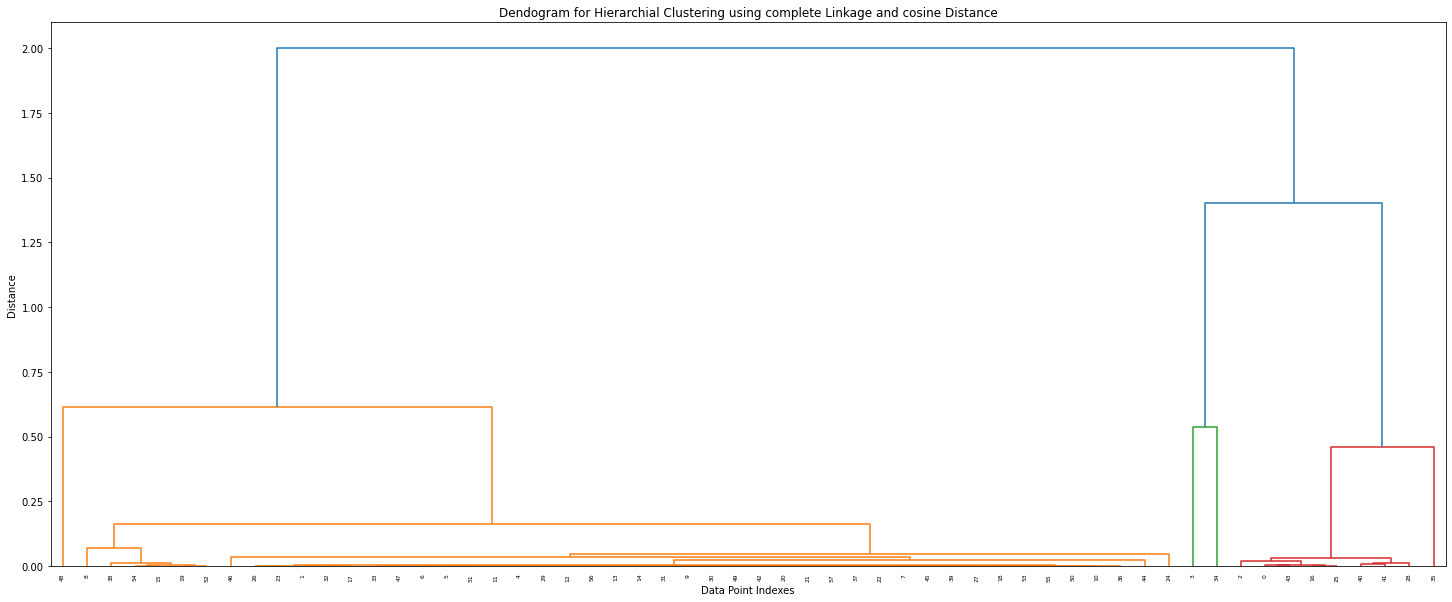


Dropping feature:  GSM613415


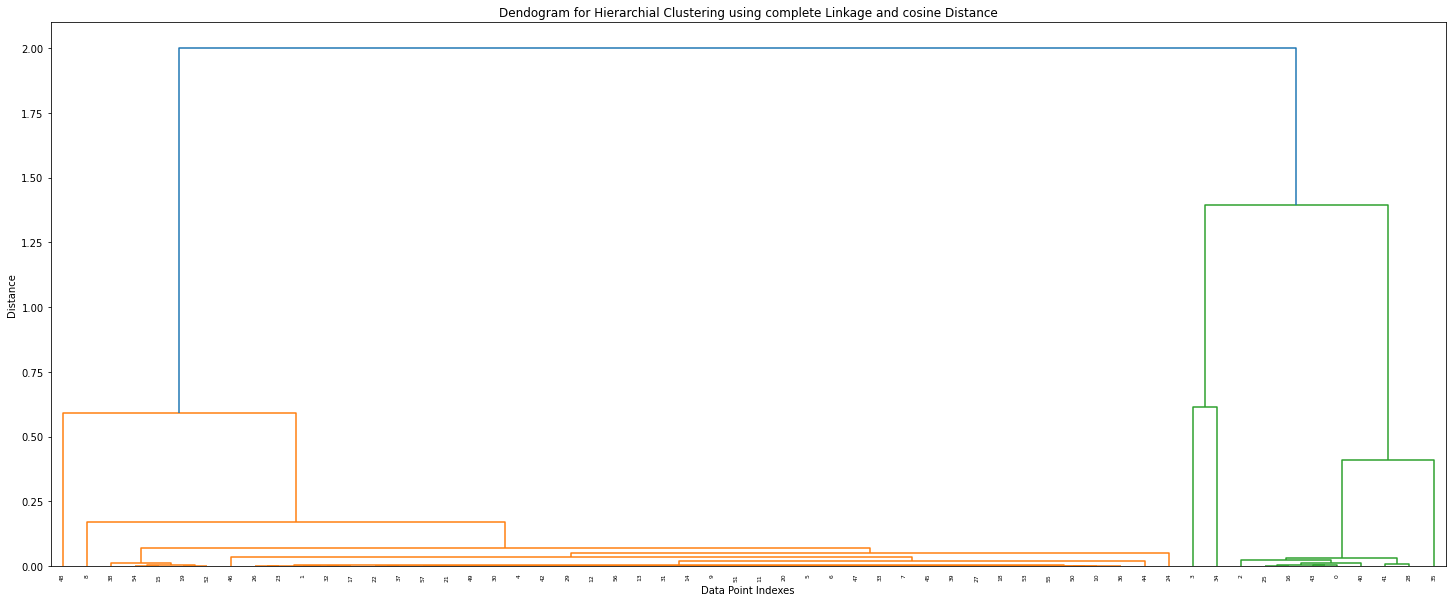


Dropping feature:  GSM613416


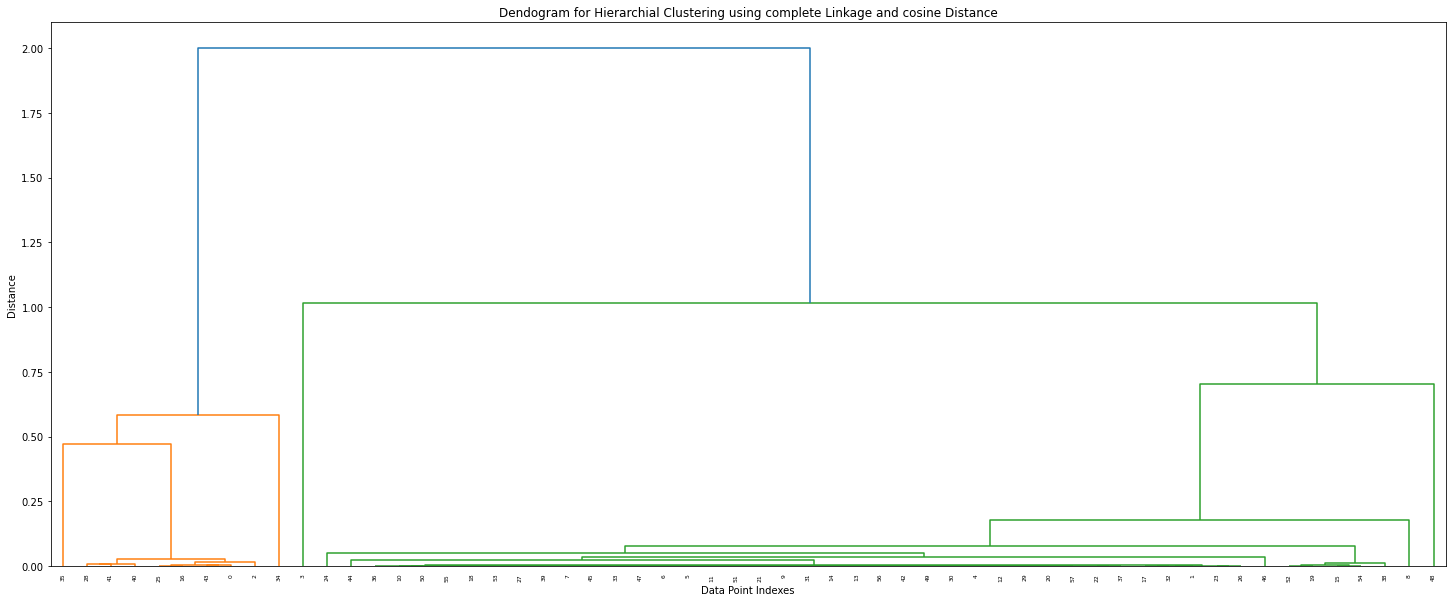


Dropping feature:  GSM613417


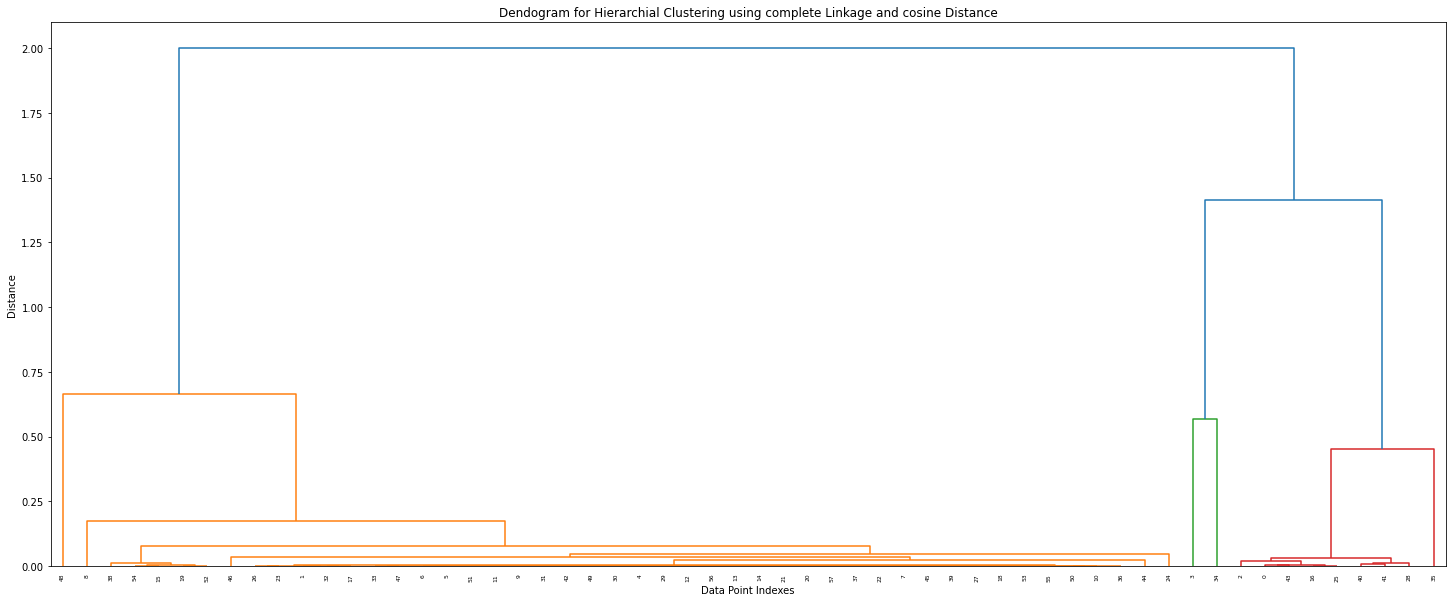


Dropping feature:  GSM613418


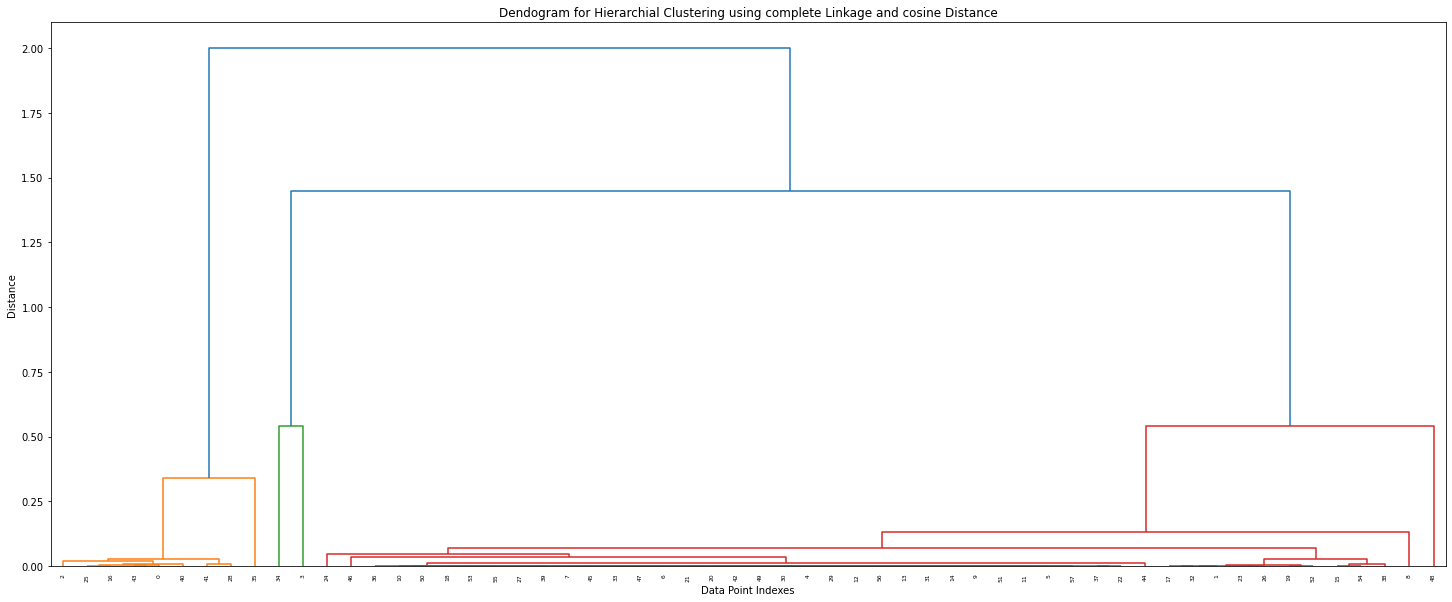


Dropping feature:  GSM613419


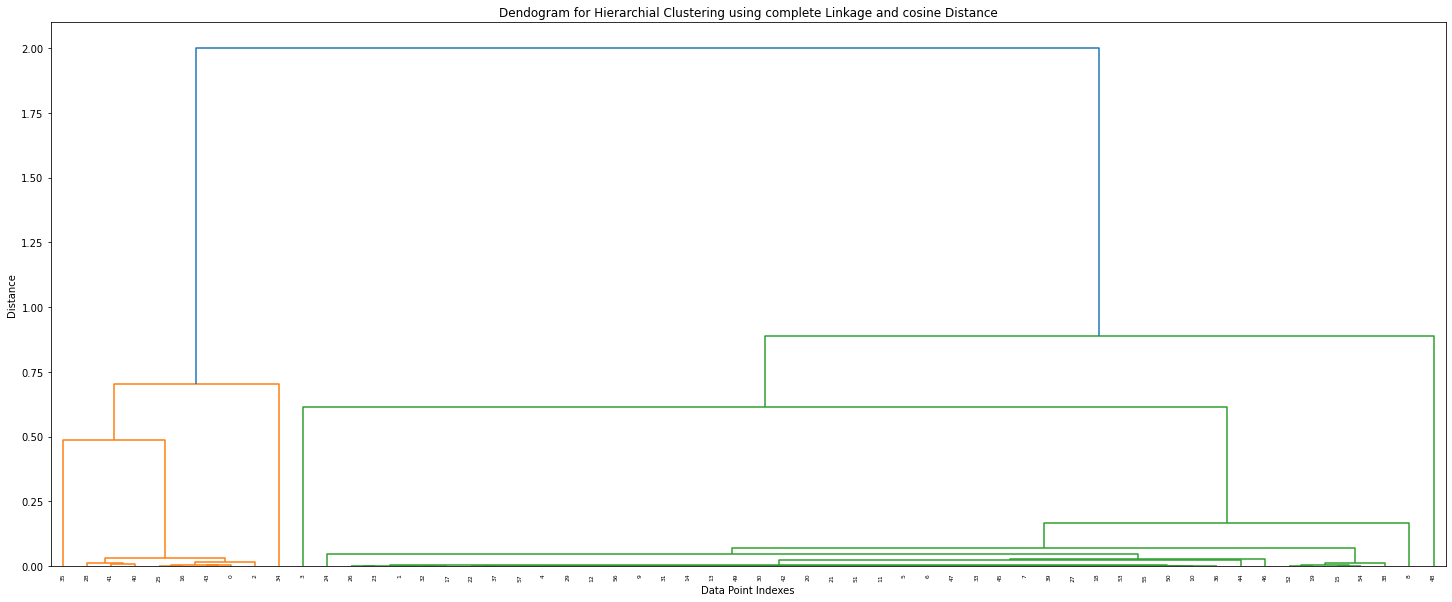


Dropping feature:  GSM613420


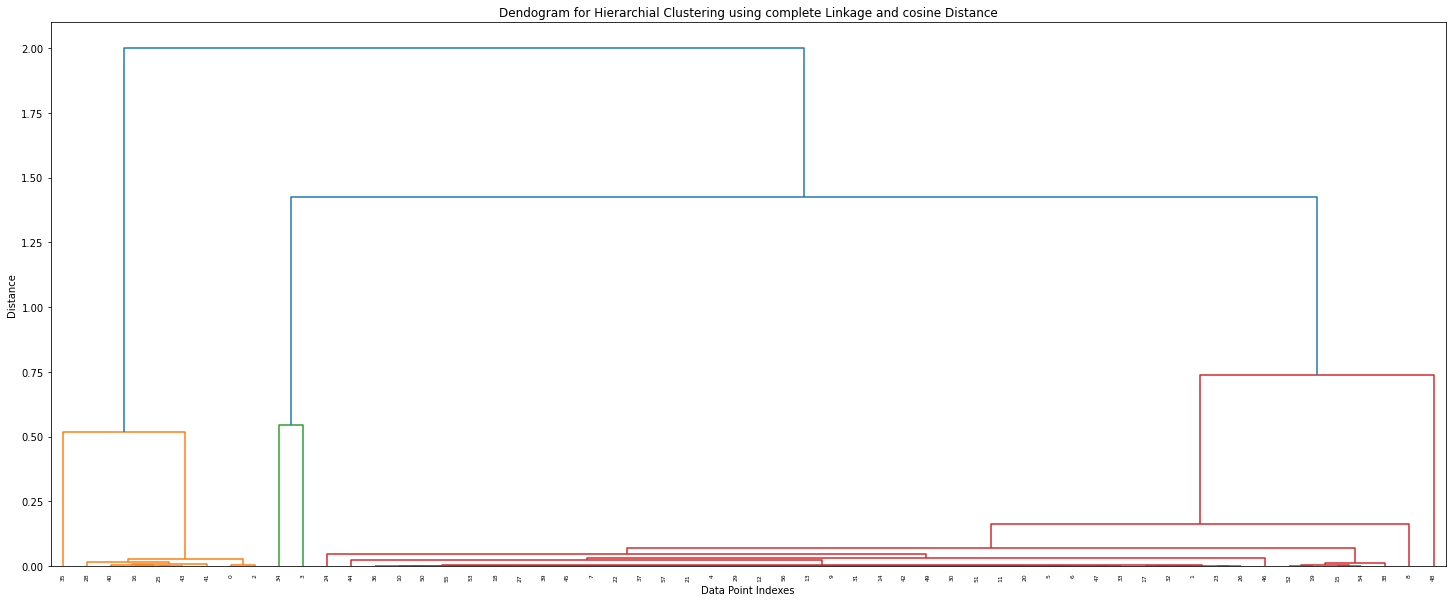


Dropping feature:  GSM613421


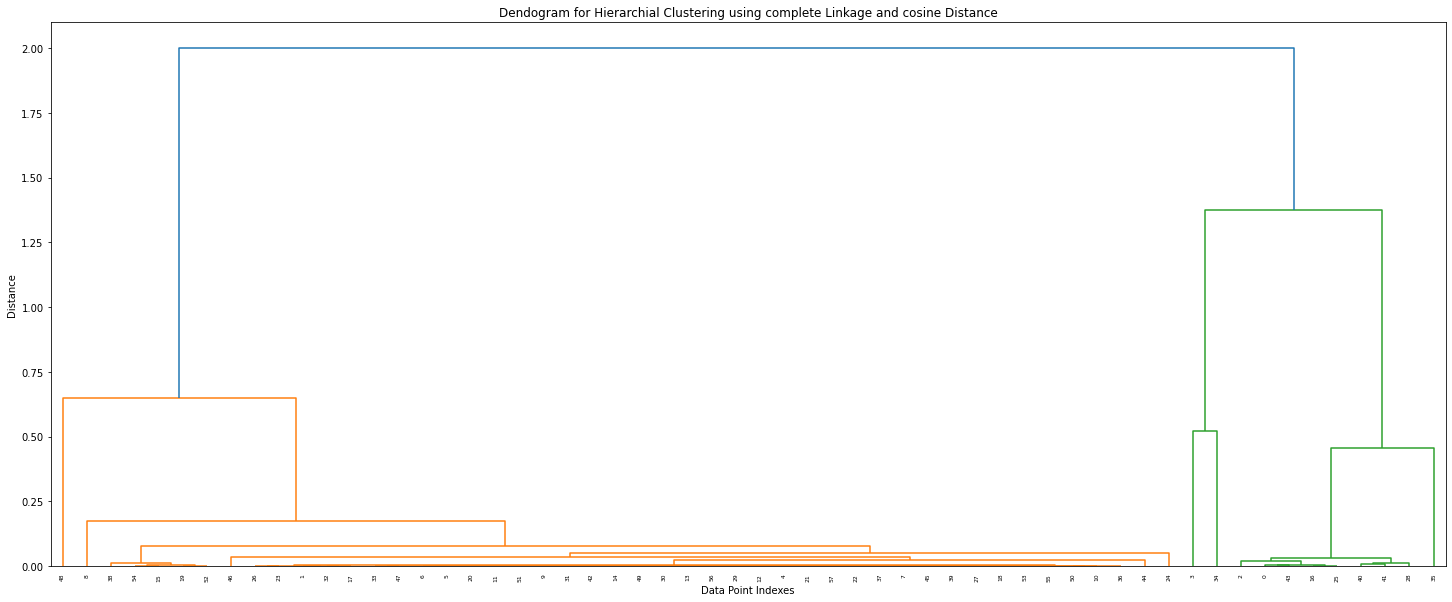


Dropping feature:  GSM613422


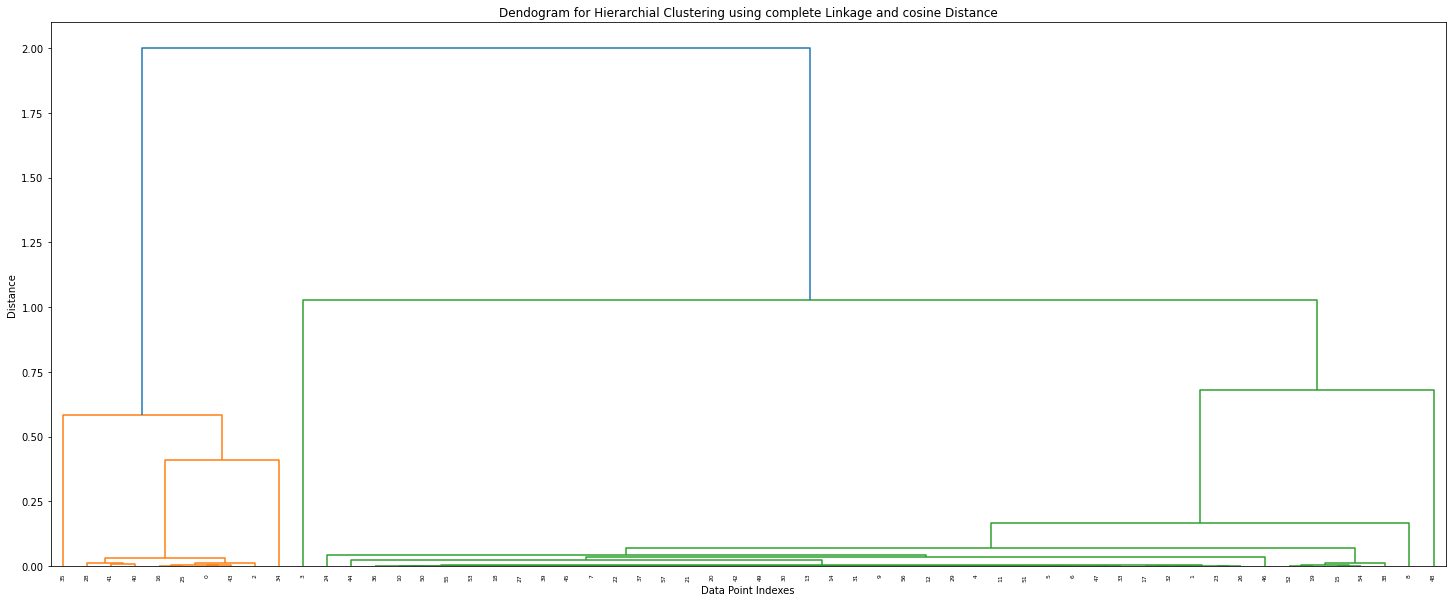


Dropping feature:  GSM613423


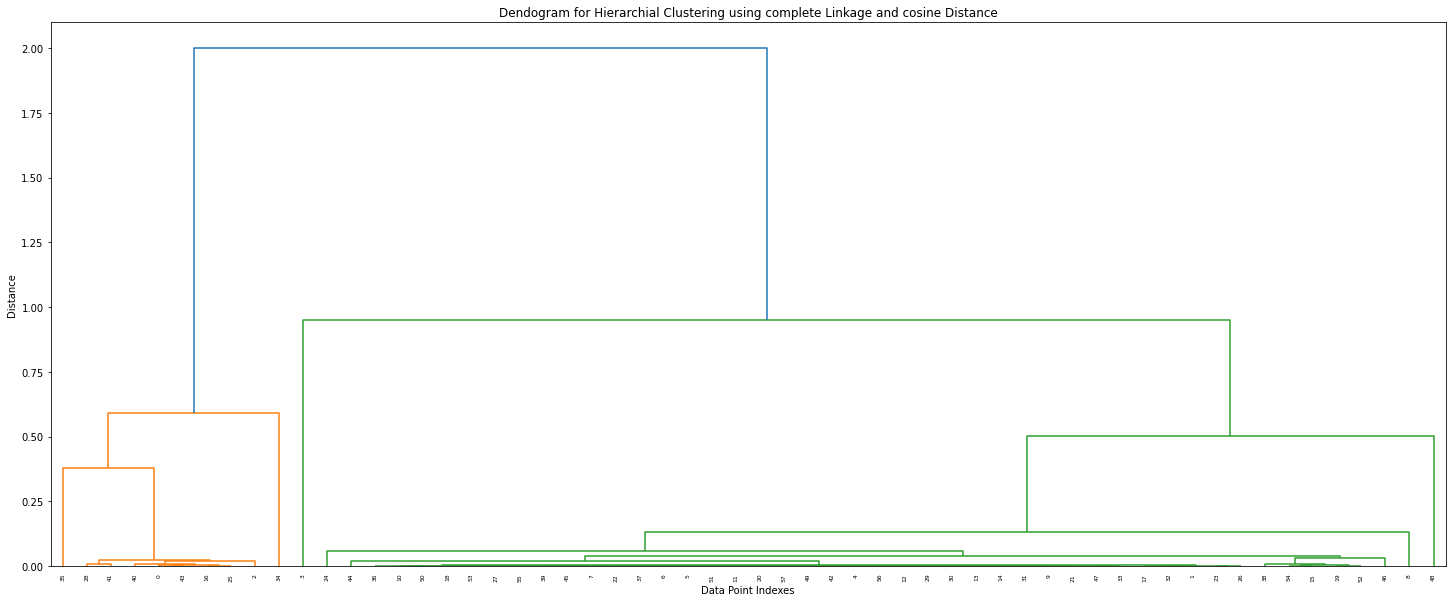

In [130]:
# Part 2

# dropping the ID ref column 
dataset_genes = dataset_genes.drop(['ID_REF'], axis=1)

# standardizing the data
dataset_genes = (dataset_genes - dataset_genes.mean())/dataset_genes.std()

# running the model
hc = Hierarchial_Clustering(dataset_genes, linkage_types[0], distance_types[0])
for linkage_type in linkage_types:
    for distance_type in distance_types:
        hc.change_params(linkage_type, distance_type)
        Z = hc.linkage_matrix()
        hc.plot_dendogram(Z)

# Randomly choosing the linkage type and distance type and dropping features
print("Randomly choosing the linkage type and distance type and dropping features")
rand_linkage_type = np.random.choice(linkage_types)
rand_distance_type = np.random.choice(distance_types)
print("Linkage Type: ", rand_linkage_type)
print("Distance Type: ", rand_distance_type)

for cols in dataset_genes.columns:
    hc.change_params(rand_linkage_type, rand_distance_type)
    hc.dataset = dataset_genes.drop([cols], axis=1)
    Z = hc.linkage_matrix()
    print("\nDropping feature: ", cols)
    hc.plot_dendogram(Z)

### Observations on dropping the columns

#### Linkages:
##### We observe that `single` linkage gives long and unbalanced clusters.
##### `complete` linkage gives balanced clusters.
##### `average` linkage gives clusters with medium length and balanced.

### Features:
##### We observe that distance between clusters becomes large on dropping GSM613419